# Imports

In [11]:
%matplotlib inline

# Dependencies and Setup

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Raw data file
file_to_load = "Resources/nfl_data.csv"

# Read purchasing file and store into pandas data frame
nfldata_raw = pd.read_csv(file_to_load)

# Cleaning the Data

In [12]:
#Grabbing Columns relavent to our research
nfl = nfldata_raw[["Date", "GameID", "down", "Yards.Gained", "FirstDown", "Touchdown", "PlayType", \
                  "PassOutcome", "PassLength", "AirYards", "PassLocation", "RushAttempt", \
                  "RunLocation", "Reception", "Season"]]

#creating a column to count play for future sumations
nfl["PlayCount"] = 1

#dropping rows where [down]=Nan; these represent special teams plays and extra points
nfl.dropna(subset=["down"], inplace=True)

#filtering for only playtypes = Pass or Run
nfl = nfl[(nfl["PlayType"] == "Pass") | (nfl["PlayType"] =="Run")]
nfl.count()

Date            279552
GameID          279552
down            279552
Yards.Gained    279552
FirstDown       279552
Touchdown       279552
PlayType        279552
PassOutcome     158929
PassLength      158435
AirYards        279552
PassLocation    158435
RushAttempt     279552
RunLocation     119303
Reception       279552
Season          279552
PlayCount       279552
dtype: int64

# Parsing the Data and Creating DataFrames

In [13]:
#Blank Lists used to append
ptotals = []
p = []
rtotals = []
r = []

    NFL PASSING DATA

In [14]:
#NFL Passing Data
#Grabbing only the records where the PlayType = Pass from our NFL Data
nfl_pass = nfl.loc[nfl['PlayType'] == "Pass"]

#dropping where passlocations = NA
nfl_pass.dropna(subset=["PassLocation"], inplace=True)

#Create DataFrame for only Passing columns
npass = nfl_pass[["down", "Yards.Gained", "AirYards", "FirstDown", "Touchdown", "PlayCount"]]

#Group by Down
p = npass.groupby(["down"]).sum()

#Create DataFrame of Totals for all downs
ptotals = pd.DataFrame({"down": ["Overall"], 
                       "Yards.Gained": p["Yards.Gained"].sum(),
                       "AirYards": p["AirYards"].sum(),
                       "FirstDown": p["FirstDown"].sum(),
                       "Touchdown": p["Touchdown"].sum(),
                       "PlayCount": p["PlayCount"].sum()})
ptotals = ptotals.set_index("down")

#Append Totals to Pass table
p = p.append(ptotals)

#Average/Rates
p['AvgYardsGained_PerPlay'] = round(p["Yards.Gained"] / p["PlayCount"], 3)
p['RateofFirstDown_PerPlay'] = round(p["FirstDown"] / p["PlayCount"], 3)
p['RateofTouchdown_PerPlay'] = round(p["Touchdown"] / p["PlayCount"], 3)

p

,Yards.Gained,AirYards,FirstDown,Touchdown,PlayCount,AvgYardsGained_PerPlay,RateofFirstDown_PerPlay,RateofTouchdown_PerPlay
down,,,,,,,,
1.0,446962,512009,15982.0,2604,59123,7.560,0.270,0.044
2.0,366677,401732,16249.0,2410,52671,6.962,0.308,0.046
3.0,311825,387300,15534.0,2373,44119,7.068,0.352,0.054
4.0,15695,26543,2091.0,238,2521,6.226,0.829,0.094
Overall,1141159,1327584,49856.0,7625,158434,7.203,0.315,0.048


    PASS ANALYSIS BY DIRECTION

In [15]:
#Create DataFrame for only Passing columns; this DataFrame includes PassLocation
npass = nfl_pass[["down", "Yards.Gained", "AirYards", "FirstDown", "Touchdown", "PlayCount", "PassLocation", "PassOutcome"]]

#Create a column to use as a count for completed pass so that we can calculate completion rate when summing the DataFrame
npass["CompletedPassCount"] = np.where(npass['PassOutcome']=='Complete', 1, 0)

#Group by Down
pb = npass.groupby(["down", "PassLocation"]).sum()

#Calcuation of Rates
pb["PassCompletionRate"] = round(pb["CompletedPassCount"] / pb["PlayCount"], 3)
pb['AvgYardsGained_PerPlay'] = round(pb["Yards.Gained"] / pb["PlayCount"], 3)
pb['RateofFirstDown_PerPlay'] = round(pb["FirstDown"] / pb["PlayCount"], 3)
pb['RateofTouchdown_PerPlay'] = round(pb["Touchdown"] / pb["PlayCount"], 3)
pb

Yards.Gained  AirYards  FirstDown  Touchdown  PlayCount  \
down PassLocation                                                            
1.0  left                158420    180009     5624.0        921      21441   
     middle              119690    133818     4402.0        676      13188   
     right               168852    198182     5956.0       1007      24494   
2.0  left                131116    142118     5917.0        819      19337   
     middle               96505    106269     4159.0        646      11892   
     right               139056    153345     6173.0        945      21442   
3.0  left                104568    137009     5294.0        792      15654   
     middle               94153    103489     4476.0        705      11414   
     right               113104    146802     5764.0        876      17051   
4.0  left                  5042      8790      699.0         81        828   
     middle                5216      7006      556.0         63        677   
     right                 5437     10747      836.0         94       1016   

                   CompletedPassCount  PassCompletionRate  \
down PassLocation                                           
1.0  left                       13633               0.636   
     middle                      8734               0.662   
     right                      15257               0.623   
2.0  left                       12404               0.641   
     middle                      7723               0.649   
     right                      13467               0.628   
3.0  left                        8888               0.568   
     middle                      7093               0.621   
     right                       9579               0.562   
4.0  left                         415               0.501   
     middle                       377               0.557   
     right                        496               0.488   

                   AvgYardsGained_PerPlay  RateofFirstDown_PerPlay  \
down PassLocation                                                    
1.0  left                           7.389                    0.262   
     middle                         9.076                    0.334   
     right                          6.894                    0.243   
2.0  left                           6.781                    0.306   
     middle                         8.115                    0.350   
     right                          6.485                    0.288   
3.0  left                           6.680                    0.338   
     middle                         8.249                    0.392   
     right                          6.633                    0.338   
4.0  left                           6.089                    0.844   
     middle                         7.705                    0.821   
     right                          5.351                    0.823   

                   RateofTouchdown_PerPlay  
down PassLocation                           
1.0  left                            0.043  
     middle                          0.051  
     right                           0.041  
2.0  left                            0.042  
     middle                          0.054  
     right                           0.044  
3.0  left                            0.051  
     middle                          0.062  
     right                           0.051  
4.0  left                            0.098  
     middle                          0.093  
     right                           0.093

    NFL RUN DATA

In [16]:
#NFL Rushing Data
#Grabbing only the records where the PlayType = Pass from our NFL Data
nfl_run = nfl.loc[nfl['PlayType'] == "Run"]

#dropping where runlocations = NA
nfl_run.dropna(subset=["RunLocation"], inplace=True)

#Create DataFrame for only Rushing Columns
nrun = nfl_run[["down", "Yards.Gained", "RushAttempt", "FirstDown", "Touchdown", "PlayCount"]]

#Group by Down
r = nrun.groupby(["down"]).sum()

#Create DataFrame of Totals for all downs
rtotals = pd.DataFrame({"down": ["Overall"], 
                       "Yards.Gained": r["Yards.Gained"].sum(),
                       "RushAttempt": r["RushAttempt"].sum(),
                       "FirstDown": r["FirstDown"].sum(),
                       "Touchdown": r["Touchdown"].sum(),
                       "PlayCount": r["PlayCount"].sum()})
rtotals = rtotals.set_index("down")

#Append Totals to Run table
r = r.append(rtotals)

#Average/Rates
r['AvgYardsGained_PerPlay'] = round(r["Yards.Gained"] / r["PlayCount"], 3)
r['RateofFirstDown_PerPlay'] = round(r["FirstDown"] / r["PlayCount"], 3)
r['RateofTouchdown_PerPlay'] = round(r["Touchdown"] / r["PlayCount"], 3)

r

,Yards.Gained,RushAttempt,FirstDown,Touchdown,PlayCount,AvgYardsGained_PerPlay,RateofFirstDown_PerPlay,RateofTouchdown_PerPlay
down,,,,,,,,
1.0,285121,64984,7098.0,1724,64984,4.388,0.109,0.027
2.0,177259,40467,10285.0,1251,40467,4.380,0.254,0.031
3.0,58182,12368,5313.0,611,12368,4.704,0.430,0.049
4.0,4889,1427,1205.0,135,1427,3.426,0.844,0.095
Overall,525451,119246,23901.0,3721,119246,4.406,0.200,0.031


    RUN ANALYSIS BY DIRECTION
   

In [17]:
#Create DataFrame for only Rushing columns
nrun = nfl_run[["down", "Yards.Gained", "FirstDown", "Touchdown", "PlayCount", "RunLocation"]]

#Group by Down
rb = nrun.groupby(["down", "RunLocation"]).sum()

#Calculation of Rates
rb["AverageYardsPerRun"] = rb["Yards.Gained"] / rb["PlayCount"]
rb['RateofFirstDown_PerPlay'] = round(rb["FirstDown"] / rb["PlayCount"], 3)
rb['RateofTouchdown_PerPlay'] = round(rb["Touchdown"] / rb["PlayCount"], 3)
rb

Yards.Gained  FirstDown  Touchdown  PlayCount  \
down RunLocation                                                  
1.0  left               109748     2920.0        695      23972   
     middle              68366     1485.0        465      16695   
     right              107007     2693.0        564      24317   
2.0  left                66011     3812.0        449      14700   
     middle              45356     2669.0        388      11123   
     right               65892     3804.0        414      14644   
3.0  left                21009     1699.0        201       4007   
     middle              18278     1893.0        206       4328   
     right               18895     1721.0        204       4033   
4.0  left                 1758      323.0         50        400   
     middle               1530      494.0         48        573   
     right                1601      388.0         37        454   

                  AverageYardsPerRun  RateofFirstDown_PerPlay  \
down RunLocation                                                
1.0  left                   4.578175                    0.122   
     middle                 4.094999                    0.089   
     right                  4.400502                    0.111   
2.0  left                   4.490544                    0.259   
     middle                 4.077677                    0.240   
     right                  4.499590                    0.260   
3.0  left                   5.243075                    0.424   
     middle                 4.223198                    0.437   
     right                  4.685098                    0.427   
4.0  left                   4.395000                    0.808   
     middle                 2.670157                    0.862   
     right                  3.526432                    0.855   

                  RateofTouchdown_PerPlay  
down RunLocation                           
1.0  left                           0.029  
     middle                         0.028  
     right                          0.023  
2.0  left                           0.031  
     middle                         0.035  
     right                          0.028  
3.0  left                           0.050  
     middle                         0.048  
     right                          0.051  
4.0  left                           0.125  
     middle                         0.084  
     right                          0.081

# Creating Visual Analysis Per Down

# Down 1

# Average Yards Gained by Direction on Down 1

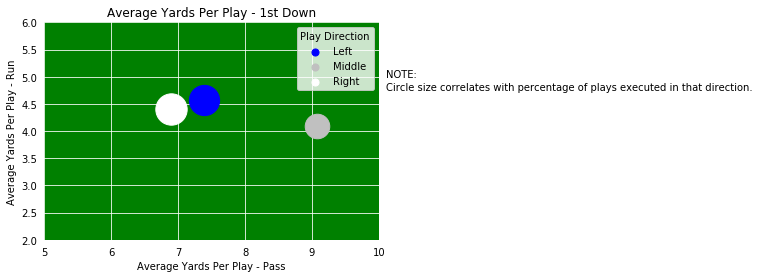

In [18]:
# Reset the index of the Pass Breakdown DataFrame
pb = pb.reset_index()

# Collect the data for 1st down pass plays by pass location and avg yards gained per play
p_avg_yds_first_left = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "left")]["AvgYardsGained_PerPlay"]
p_avg_yds_first_middle = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "middle")]["AvgYardsGained_PerPlay"]
p_avg_yds_first_right = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "right")]["AvgYardsGained_PerPlay"]

# Colect the data for the number of 1st down pass plays in each direction
pc_avg_yds_first_left = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "left")]["PlayCount"]
pc_avg_yds_first_middle = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "middle")]["PlayCount"]
pc_avg_yds_first_right = pb.loc[(pb["down"] == 1) & (pb["PassLocation"] == "right")]["PlayCount"]

# Reset the index of the Run Breakdown DataFrame
rb = rb.reset_index()

# Collect the data for 1st down run plays by run location and avg yards gained per play
r_avg_yds_first_left = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "left")]["AverageYardsPerRun"]
r_avg_yds_first_middle = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "middle")]["AverageYardsPerRun"]
r_avg_yds_first_right = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "right")]["AverageYardsPerRun"]

# Colect the data for the number of 1st down run plays in each direction
pc_avg_yds_first_left_r = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "left")]["PlayCount"]
pc_avg_yds_first_middle_r = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "middle")]["PlayCount"]
pc_avg_yds_first_right_r = rb.loc[(rb["down"] == 1) & (rb["RunLocation"] == "right")]["PlayCount"]

# Calculate the total number of 1st Down plays for the size index of the scatterplot

tpp_1 = pb.loc[(pb["down"] == 1)]["PlayCount"].sum()
trp_1 = rb.loc[(rb["down"] == 1)]["PlayCount"].sum()
tpc_1 = tpp_1 + trp_1

# Introduce a subplot to utilize "ax" functions to modify the scatterplot grid and colors
fig, ax=plt.subplots()

# Create the scatterplot showing the relation between run and pass plays in a given direction on 1st down.
ax.scatter(p_avg_yds_first_left, r_avg_yds_first_left, s=(pc_avg_yds_first_left+pc_avg_yds_first_left_r)/tpc_1*2500, marker ="o", color="blue")
ax.scatter(p_avg_yds_first_middle, r_avg_yds_first_middle, s=(pc_avg_yds_first_middle+pc_avg_yds_first_middle_r)/tpc_1*2500, marker ="o", color="silver")
ax.scatter(p_avg_yds_first_right, r_avg_yds_first_right, s=(pc_avg_yds_first_right+pc_avg_yds_first_right_r)/tpc_1*2500, marker ="o", color="white")

# Set the x and y limits to be consistent for all 4 graphs to accurately show change between downs
ax.set_ylim(2,6)
ax.set_xlim(5,10)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")

# Set the grid lines behind the plots and remove unneccessary spines
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the scatterplot
ax.set_xlabel("Average Yards Per Play - Pass")
ax.set_ylabel("Average Yards Per Play - Run")
ax.set_title("Average Yards Per Play - 1st Down")

# Create sample plots for legend to control the size of the color label
left = plt.scatter([],[], s=50, marker = "o", color = "blue")
middle = plt.scatter([],[], s=50, marker = "o", color = "silver")
right = plt.scatter([],[], s=50, marker = "o", color = "white")
plt.legend((left, middle, right), ("Left", "Middle", "Right"), loc='best', title="Play Direction")

# Note that the size of the plot correlates to the percentage of plays run in that direction
plt.text(10.1,5, "NOTE:")
plt.text(10.1,4.75, "Circle size correlates with percentage of plays executed in that direction.")
plt.tick_params(bottom=False, left=False)

# Export graph for presentation
plt.savefig("Output/Avg_Yds_Play_1.png", bbox_inches="tight")

plt.show()

# Rate of 1st Down by Direction on Down 1

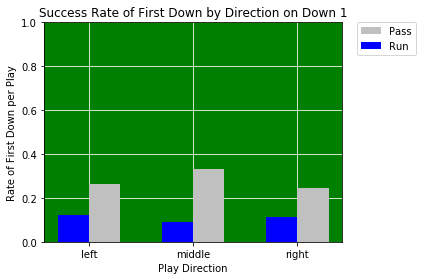

In [19]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 1 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 1]["RateofFirstDown_PerPlay"]
px1 = cp.loc[cp["down"] == 1]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 1 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 1]["RateofFirstDown_PerPlay"]
rx1 = cr.loc[cr["down"] == 1]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of First Down per Play")

# Set the y limits of our plot to: 0 to 1
plt.ylim(0, 1)

plt.title("Success Rate of First Down by Direction on Down 1")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_First_1.png")

plt.show()

# Touchdown Rate by Direction on Down 1

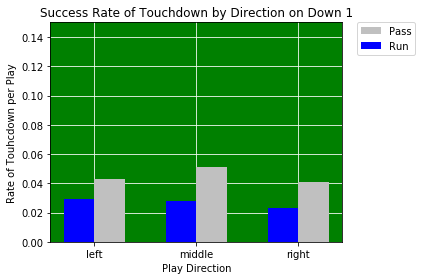

In [20]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 1 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 1]["RateofTouchdown_PerPlay"]
px1 = cp.loc[cp["down"] == 1]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 1 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 1]["RateofTouchdown_PerPlay"]
rx1 = cr.loc[cr["down"] == 1]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of Touhcdown per Play")

# Set the y limits of our plot to: 0 to .15
plt.ylim(0, .15)

plt.title("Success Rate of Touchdown by Direction on Down 1")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_TD_1.png")

plt.show()

# Down 2

# Average Yards Gained by Direction on Down 2

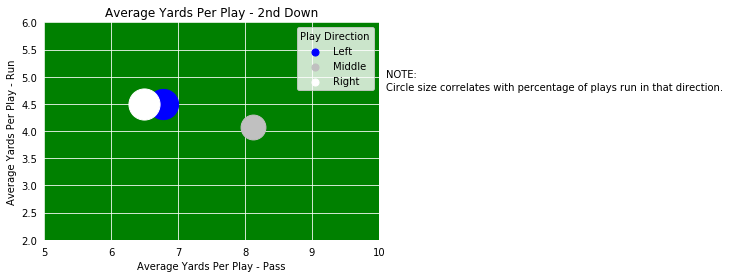

In [21]:
# Collect the data for 2nd down pass plays by pass location and avg yards gained per play
p_avg_yds_left = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "left")]["AvgYardsGained_PerPlay"]
p_avg_yds_middle = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "middle")]["AvgYardsGained_PerPlay"]
p_avg_yds_right = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "right")]["AvgYardsGained_PerPlay"]

# Colect the data for the number of 2nd down pass plays in each direction
pc_avg_yds_left = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "left")]["PlayCount"]
pc_avg_yds_middle = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "middle")]["PlayCount"]
pc_avg_yds_right = pb.loc[(pb["down"] == 2) & (pb["PassLocation"] == "right")]["PlayCount"]

# Collect the data for 2nd down run plays by run location and avg yards gained per play
r_avg_yds_left = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "left")]["AverageYardsPerRun"]
r_avg_yds_middle = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "middle")]["AverageYardsPerRun"]
r_avg_yds_right = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "right")]["AverageYardsPerRun"]

# Colect the data for the number of 2nd down run plays in each direction
pc_avg_yds_left_r = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "left")]["PlayCount"]
pc_avg_yds_middle_r = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "middle")]["PlayCount"]
pc_avg_yds_right_r = rb.loc[(rb["down"] == 2) & (rb["RunLocation"] == "right")]["PlayCount"]

# Calculate the total number of 2nd Down plays for the size index of the scatterplot

tpp_2 = pb.loc[(pb["down"] == 2)]["PlayCount"].sum()
trp_2 = rb.loc[(rb["down"] == 2)]["PlayCount"].sum()
tpc_2 = tpp_2 + trp_2

# Introduce a subplot to utilize "ax" functions to modify the scatterplot grid and colors
fig, ax=plt.subplots()

# Create the scatterplot showing the relation between run and pass plays in a given direction on 2nd down.
ax.scatter(p_avg_yds_left, r_avg_yds_left, s=(pc_avg_yds_left+pc_avg_yds_left_r)/tpc_2*2500, marker ="o", color="blue")
ax.scatter(p_avg_yds_middle, r_avg_yds_middle, s=(pc_avg_yds_middle+pc_avg_yds_middle_r)/tpc_2*2500, marker ="o", color="silver")
ax.scatter(p_avg_yds_right, r_avg_yds_right, s=(pc_avg_yds_right+pc_avg_yds_right_r)/tpc_2*2500, marker ="o", color="white")

# Set the x and y limits to be consistent for all 4 graphs to accurately show change between downs
ax.set_ylim(2,6)
ax.set_xlim(5,10)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")

# Set the grid lines behind the plots and remove unneccessary spines
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the scatterplot
ax.set_xlabel("Average Yards Per Play - Pass")
ax.set_ylabel("Average Yards Per Play - Run")
ax.set_title("Average Yards Per Play - 2nd Down")

# Create sample plots for legend to control the size of the color label
left = plt.scatter([],[], s=50, marker = "o", color = "blue")
middle = plt.scatter([],[], s=50, marker = "o", color = "silver")
right = plt.scatter([],[], s=50, marker = "o", color = "white")
plt.legend((left, middle, right), ("Left", "Middle", "Right"), loc='best', title="Play Direction")

# Note that the size of the plot correlates to the percentage of plays run in that direction
plt.text(10.1,5, "NOTE:")
plt.text(10.1,4.75, "Circle size correlates with percentage of plays run in that direction.")
plt.tick_params(bottom=False, left=False)

# Export graph for presentation
plt.savefig("Output/Avg_Yds_Play_2.png", bbox_inches="tight")

plt.show()

# Rate of 1st Down by Direction on Down 2

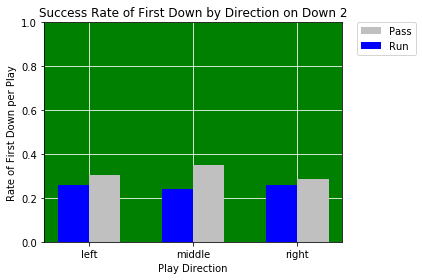

In [22]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 2 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 2]["RateofFirstDown_PerPlay"]
px1 = cp.loc[cp["down"] == 2]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 2 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 2]["RateofFirstDown_PerPlay"]
rx1 = cr.loc[cr["down"] == 2]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of First Down per Play")

# Set the y limits of our plot to: 0 to 1
plt.ylim(0, 1)

plt.title("Success Rate of First Down by Direction on Down 2")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_First_2.png")

plt.show()

# Touchdown Rate by Direction on Down 2

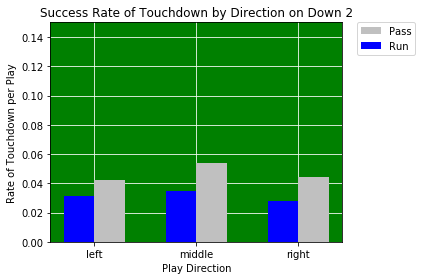

In [23]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 2 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 2]["RateofTouchdown_PerPlay"]
px1 = cp.loc[cp["down"] == 2]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 2 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 2]["RateofTouchdown_PerPlay"]
rx1 = cr.loc[cr["down"] == 2]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of Touchdown per Play")

# Set the y limits of our plot to: 0 to .15
plt.ylim(0, .15)

plt.title("Success Rate of Touchdown by Direction on Down 2")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_TD_2.png")

plt.show()

# Down 3

# Average Yards Gained by Direction on Down 3

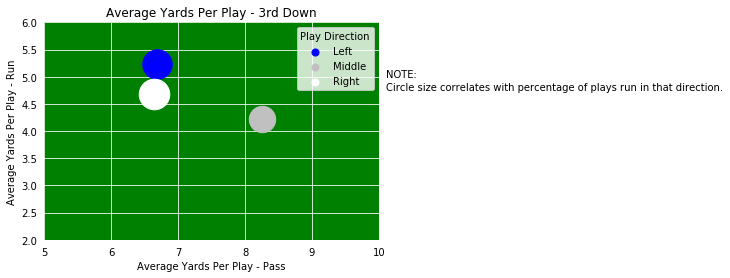

In [24]:
# Collect the data for 3rd down pass plays by pass location and avg yards gained per play
p_avg_yds_third_left = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "left")]["AvgYardsGained_PerPlay"]
p_avg_yds_third_middle = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "middle")]["AvgYardsGained_PerPlay"]
p_avg_yds_third_right = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "right")]["AvgYardsGained_PerPlay"]

# Colect the data for the number of 3rd down pass plays in each direction
pc_avg_yds_third_left = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "left")]["PlayCount"]
pc_avg_yds_third_middle = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "middle")]["PlayCount"]
pc_avg_yds_third_right = pb.loc[(pb["down"] == 3) & (pb["PassLocation"] == "right")]["PlayCount"]

# Collect the data for 3rd down run plays by run location and avg yards gained per play
r_avg_yds_third_left = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "left")]["AverageYardsPerRun"]
r_avg_yds_third_middle = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "middle")]["AverageYardsPerRun"]
r_avg_yds_third_right = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "right")]["AverageYardsPerRun"]

# Colect the data for the number of 3rd down run plays in each direction
pc_avg_yds_third_left_r = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "left")]["PlayCount"]
pc_avg_yds_third_middle_r = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "middle")]["PlayCount"]
pc_avg_yds_third_right_r = rb.loc[(rb["down"] == 3) & (rb["RunLocation"] == "right")]["PlayCount"]

# Calculate the total number of 3rd Down plays for the size index of the scatterplot

tpp_3 = pb.loc[(pb["down"] == 3)]["PlayCount"].sum()
trp_3 = rb.loc[(rb["down"] == 3)]["PlayCount"].sum()
tpc_3 = tpp_3 + trp_3

# Introduce a subplot to utilize "ax" functions to modify the scatterplot grid and colors
fig, ax=plt.subplots()

# Create the scatterplot showing the relation between run and pass plays in a given direction on 3rd down.
ax.scatter(p_avg_yds_third_left, r_avg_yds_third_left, s=(pc_avg_yds_third_left+pc_avg_yds_third_left_r)/tpc_3*2500, marker ="o", color="blue")
ax.scatter(p_avg_yds_third_middle, r_avg_yds_third_middle, s=(pc_avg_yds_third_middle+pc_avg_yds_third_middle_r)/tpc_3*2500, marker ="o", color="silver")
ax.scatter(p_avg_yds_third_right, r_avg_yds_third_right, s=(pc_avg_yds_third_right+pc_avg_yds_third_right_r)/tpc_3*2500, marker ="o", color="white")

# Set the x and y limits to be consistent for all 4 graphs to accurately show change between downs
ax.set_ylim(2,6)
ax.set_xlim(5,10)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")

# Set the grid lines behind the plots and remove unneccessary spines
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the scatterplot
ax.set_xlabel("Average Yards Per Play - Pass")
ax.set_ylabel("Average Yards Per Play - Run")
ax.set_title("Average Yards Per Play - 3rd Down")

# Create sample plots for legend to control the size of the color label
left = plt.scatter([],[], s=50, marker = "o", color = "blue")
middle = plt.scatter([],[], s=50, marker = "o", color = "silver")
right = plt.scatter([],[], s=50, marker = "o", color = "white")
plt.legend((left, middle, right), ("Left", "Middle", "Right"), loc='best', title="Play Direction")

# Note that the size of the plot correlates to the percentage of plays run in that direction
plt.text(10.1,5, "NOTE:")
plt.text(10.1,4.75, "Circle size correlates with percentage of plays run in that direction.")
plt.tick_params(bottom=False, left=False)

# Export graph for presentation
plt.savefig("Output/Avg_Yds_Play_3.png", bbox_inches="tight")

plt.show()

# Rate of 1st Down by Direction on Down 3

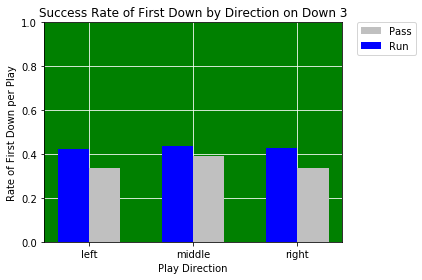

In [25]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 3 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 3]["RateofFirstDown_PerPlay"]
px1 = cp.loc[cp["down"] == 3]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 3 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 3]["RateofFirstDown_PerPlay"]
rx1 = cr.loc[cr["down"] == 3]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of First Down per Play")

# Set the y limits of our plot to: 0 to 1
plt.ylim(0, 1)

plt.title("Success Rate of First Down by Direction on Down 3")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_First_3.png")

plt.show()

# Touchdown Rate by Direction on Down 3

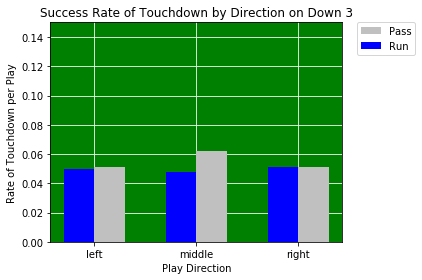

In [26]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 3 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 3]["RateofTouchdown_PerPlay"]
px1 = cp.loc[cp["down"] == 3]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 3 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 3]["RateofTouchdown_PerPlay"]
rx1 = cr.loc[cr["down"] == 3]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of Touchdown per Play")

# Set the y limits of our plot to: 0 to .15
plt.ylim(0, .15)

plt.title("Success Rate of Touchdown by Direction on Down 3")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_TD_3.png")

plt.show()

# Down 4

# Average Yards Gained by Direction on Down 4

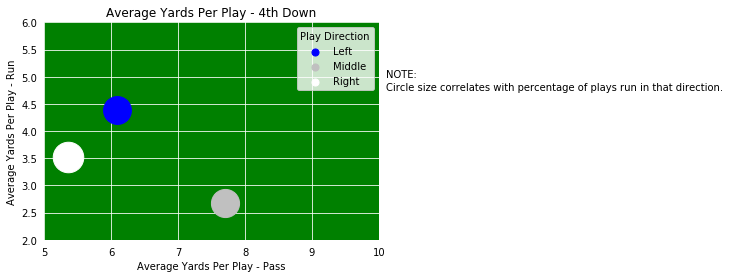

In [27]:
# Collect the data for 4th down pass plays by pass location and avg yards gained per play
p_avg_yds_fourth_left = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "left")]["AvgYardsGained_PerPlay"]
p_avg_yds_fourth_middle = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "middle")]["AvgYardsGained_PerPlay"]
p_avg_yds_fourth_right = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "right")]["AvgYardsGained_PerPlay"]

# Colect the data for the number of 4th down pass plays in each direction
pc_avg_yds_fourth_left = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "left")]["PlayCount"]
pc_avg_yds_fourth_middle = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "middle")]["PlayCount"]
pc_avg_yds_fourth_right = pb.loc[(pb["down"] == 4) & (pb["PassLocation"] == "right")]["PlayCount"]

# Collect the data for 4th down run plays by run location and avg yards gained per play
r_avg_yds_fourth_left = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "left")]["AverageYardsPerRun"]
r_avg_yds_fourth_middle = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "middle")]["AverageYardsPerRun"]
r_avg_yds_fourth_right = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "right")]["AverageYardsPerRun"]

# Colect the data for the number of 4th down run plays in each direction
pc_avg_yds_fourth_left_r = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "left")]["PlayCount"]
pc_avg_yds_fourth_middle_r = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "middle")]["PlayCount"]
pc_avg_yds_fourth_right_r = rb.loc[(rb["down"] == 4) & (rb["RunLocation"] == "right")]["PlayCount"]

# Calculate the total number of 4th Down plays for the size index of the scatterplot

tpp_4 = pb.loc[(pb["down"] == 4)]["PlayCount"].sum()
trp_4 = rb.loc[(rb["down"] == 4)]["PlayCount"].sum()
tpc_4 = tpp_4 + trp_4

# Introduce a subplot to utilize "ax" functions to modify the scatterplot grid and colors
fig, ax=plt.subplots()

# Create the scatterplot showing the relation between run and pass plays in a given direction on 4th down.
ax.scatter(p_avg_yds_fourth_left, r_avg_yds_fourth_left, s=(pc_avg_yds_fourth_left+pc_avg_yds_fourth_left_r)/tpc_4*2500, marker ="o", color="blue", alpha=1)
ax.scatter(p_avg_yds_fourth_middle, r_avg_yds_fourth_middle, s=(pc_avg_yds_fourth_middle+pc_avg_yds_fourth_middle_r)/tpc_4*2500, marker ="o", color="silver", alpha=1)
ax.scatter(p_avg_yds_fourth_right, r_avg_yds_fourth_right, s=(pc_avg_yds_fourth_right+pc_avg_yds_fourth_right_r)/tpc_4*2500, marker ="o", color="white", alpha=1)

# Set the x and y limits to be consistent for all 4 graphs to accurately show change between downs
ax.set_ylim(2,6)
ax.set_xlim(5,10)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")

# Set the grid lines behind the plots and remove unneccessary spines
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the scatterplot
ax.set_xlabel("Average Yards Per Play - Pass")
ax.set_ylabel("Average Yards Per Play - Run")
ax.set_title("Average Yards Per Play - 4th Down")

# Create sample plots for legend to control the size of the color label
left = plt.scatter([],[], s=50, marker = "o", color = "blue")
middle = plt.scatter([],[], s=50, marker = "o", color = "silver")
right = plt.scatter([],[], s=50, marker = "o", color = "white")
plt.legend((left, middle, right), ("Left", "Middle", "Right"), loc='best', title="Play Direction")

# Note that the size of the plot correlates to the percentage of plays run in that direction
plt.text(10.1,5, "NOTE:")
plt.text(10.1,4.75, "Circle size correlates with percentage of plays run in that direction.")
plt.tick_params(bottom=False, left=False)

# Export graph for presentation
plt.savefig("Output/Avg_Yds_Play_4.png", bbox_inches="tight")

plt.show()

# Rate of 1st Down by Direction on Down 4

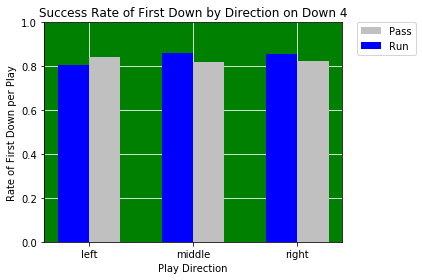

In [28]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 4 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 4]["RateofFirstDown_PerPlay"]
px1 = cp.loc[cp["down"] == 4]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 4 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 4]["RateofFirstDown_PerPlay"]
rx1 = cr.loc[cr["down"] == 4]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of First Down per Play")

# Set the y limits of our plot to: 0 to 1
plt.ylim(0, 1)

plt.title("Success Rate of First Down by Direction on Down 4")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_First_4.png")

plt.show()

# Touchdown Rate by Direction on Down 4

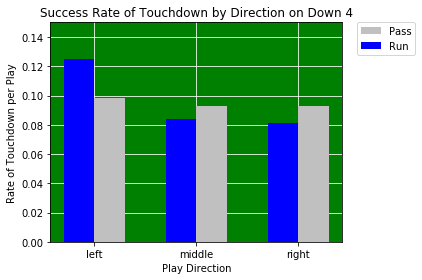

In [29]:
#Setting Subplot for visual
fig, ax=plt.subplots()

#Pass avg 1st down for down 4 passing
cp = pb.reset_index()
py1 = cp.loc[cp["down"] == 4]["RateofTouchdown_PerPlay"]
px1 = cp.loc[cp["down"] == 4]["PassLocation"]
plt.bar(px1, py1, color ="silver", align="edge", width=0.3)

#Run avg 1st down for down 4 Rushing
cr = rb.reset_index()
ry1 = cr.loc[cr["down"] == 4]["RateofTouchdown_PerPlay"]
rx1 = cr.loc[cr["down"] == 4]["RunLocation"]
plt.bar(rx1, ry1, color ="blue", align="edge", width= -0.3)

#Format graph 
#Place legend outside of plot to free up space
plt.xlabel("Play Direction")
plt.ylabel("Rate of Touchdown per Play")

# Set the y limits of our plot to: 0 to .15
plt.ylim(0, .15)

plt.title("Success Rate of Touchdown by Direction on Down 4")
plt.legend(["Pass", "Run"], markerscale = .25, fancybox = True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(b=True)

# Set color of the scatterplot green so it looks like a football field
ax.set_facecolor("green")
ax.grid(color="white")
ax.set_axisbelow(True)

#Set this so output file does not cut off legend
fig.tight_layout()

# Export graph for presentation
plt.savefig("Output/Rate_of_TD_4.png")

plt.show()